## Customers Segmentation based on their Credit Card usage bhaviour

Dataset for this notebook consists of credit card usage behavior of customers with 18 behavioral features. Segmentation of customers can be used to define marketing strategies.


**Content of this Kernel:**
* Data Preprocessing
* Clustering using KMeans
* Interpretation of Clusters
* Visualization of Clusters using PCA

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv("CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0        
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6
 


In [6]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
    data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
    data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
    data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
    data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
    data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10
    

In [7]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [8]:
data.drop(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)

X= np.asarray(data)

Normalizing input values.

In [9]:
from sklearn.preprocessing import StandardScaler

In [13]:
scale = StandardScaler()
X = scale.fit(data)

In [17]:
data_scaled = pd.DataFrame(X.transform(data), columns = data.columns)
data_scaled.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
0,0.36068,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622
1,0.36068,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039128,1.293765,1.365305,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978
2,0.36068,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039128,-0.260907,0.391952,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622
3,0.36068,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039128,-1.815578,-1.554756,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978
4,0.36068,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.661712,-0.260907,-0.581402,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622


In [19]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 2.9 MB/s eta 0:00:00


In [21]:
import warnings
warnings.filterwarnings("ignore")

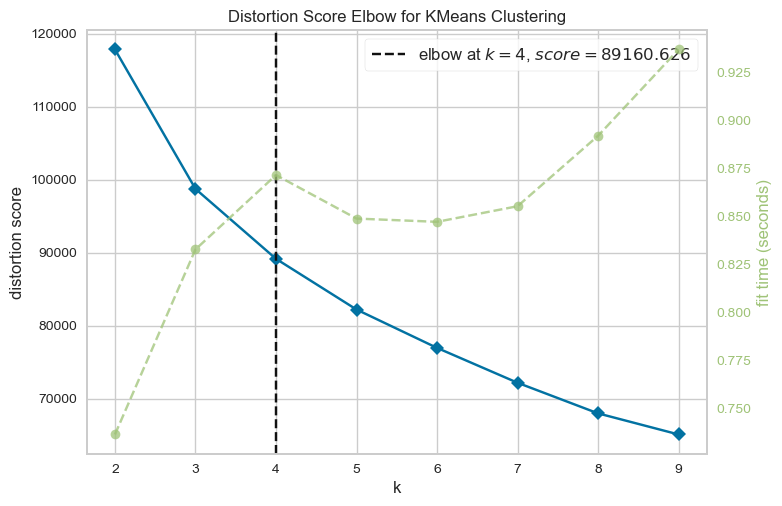

In [22]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(data_scaled)
visualizer.show()
plt.show()

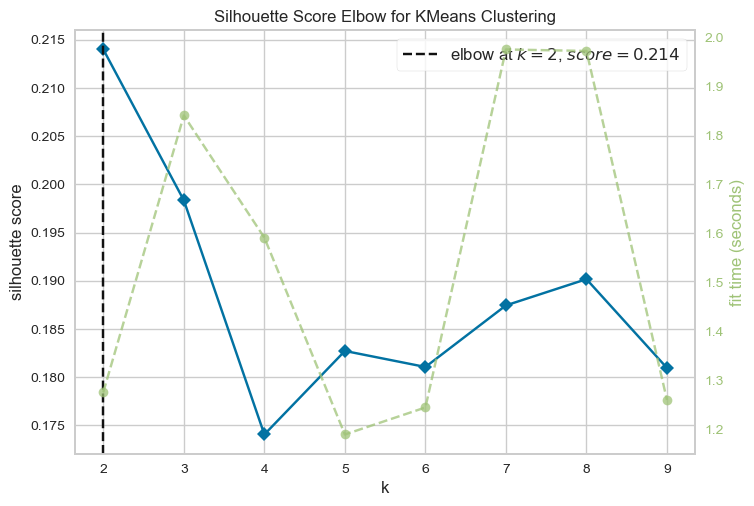

In [57]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(data_scaled)
visualizer.show()
plt.show()

По данным моделям видно, что оптимальными для построения будут 2 и 4 кластера. Проверим оба.

In [25]:
KM_4_clusters = KMeans(n_clusters=4).fit(data_scaled)

In [26]:
KM_4_clusters.labels_

array([1, 2, 3, ..., 0, 1, 1])

In [30]:
KM_clustered = data_scaled.copy()
KM_clustered.loc[:,'Cluster'] = KM_4_clusters.labels_

In [31]:
KM_clustered.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,Cluster
0,0.36068,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622,1
1,0.36068,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039128,1.293765,1.365305,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978,2
2,0.36068,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039128,-0.260907,0.391952,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622,3
3,0.36068,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039128,-1.815578,-1.554756,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978,1
4,0.36068,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.661712,-0.260907,-0.581402,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622,1


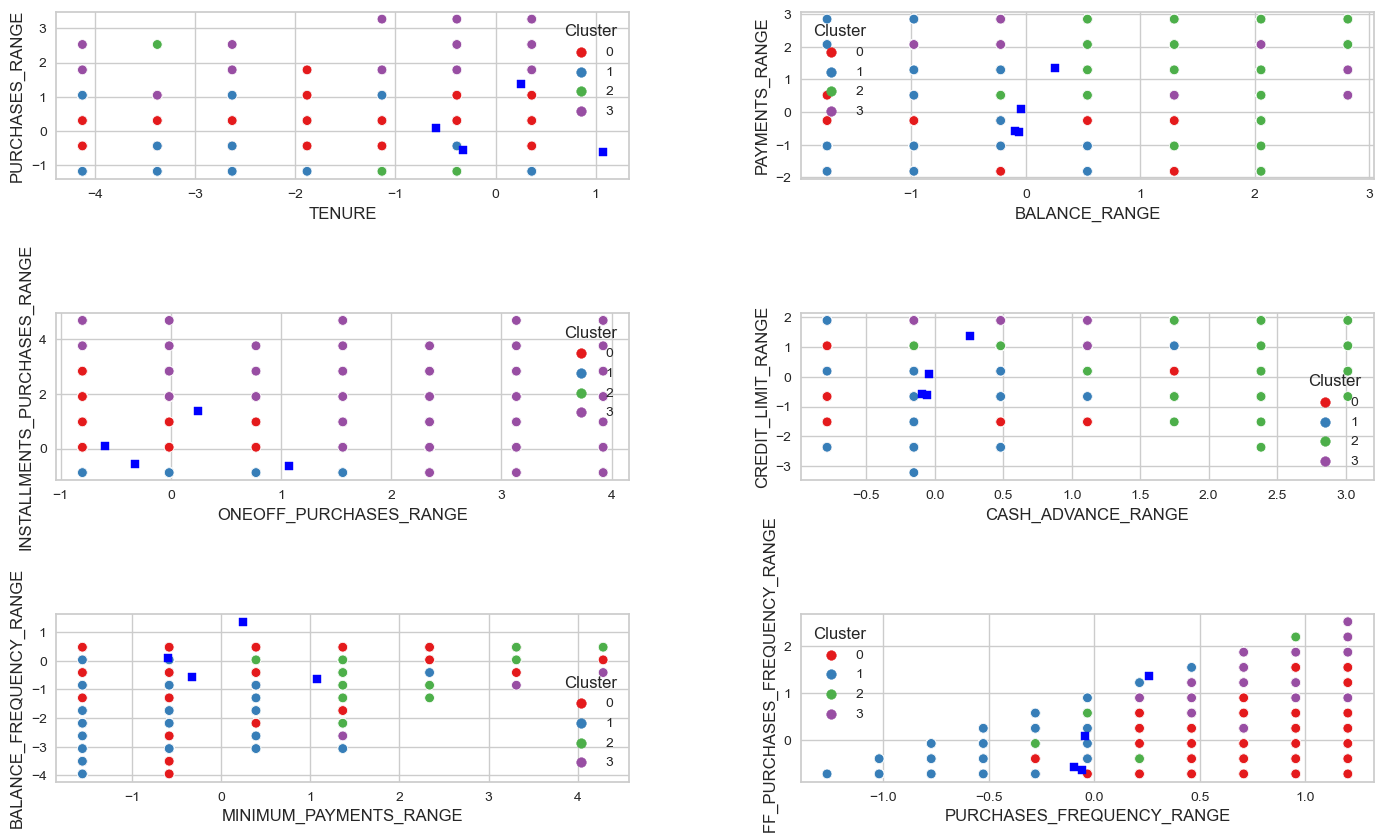

In [38]:
fig1, (axes) = plt.subplots(3,2, figsize = (17,10))

sns.scatterplot(x=KM_clustered['TENURE'], y=KM_clustered['PURCHASES_RANGE'], data=KM_clustered, 
                hue = 'Cluster', ax = axes[0,0], palette='Set1', legend = 'full')
sns.scatterplot(x=KM_clustered['BALANCE_RANGE'], y=KM_clustered['PAYMENTS_RANGE'], data = KM_clustered, 
                hue = 'Cluster', ax = axes[0,1], palette='Set1', legend = 'full')
sns.scatterplot(x=KM_clustered['ONEOFF_PURCHASES_RANGE'], y=KM_clustered['INSTALLMENTS_PURCHASES_RANGE'], data=KM_clustered, 
                hue = 'Cluster', ax = axes[1,0], palette='Set1', legend = 'full')
sns.scatterplot(x=KM_clustered['CASH_ADVANCE_RANGE'], y=KM_clustered['CREDIT_LIMIT_RANGE'], data = KM_clustered, 
                hue = 'Cluster', ax = axes[1,1], palette='Set1', legend = 'full')
sns.scatterplot(x=KM_clustered['MINIMUM_PAYMENTS_RANGE'], y=KM_clustered['BALANCE_FREQUENCY_RANGE'], data=KM_clustered, 
                hue = 'Cluster', ax = axes[2,0], palette='Set1', legend = 'full')
sns.scatterplot(x=KM_clustered['PURCHASES_FREQUENCY_RANGE'], y=KM_clustered['ONEOFF_PURCHASES_FREQUENCY_RANGE'], data = KM_clustered, 
                hue = 'Cluster', ax = axes[2,1], palette='Set1', legend = 'full')

axes[0,0].scatter(KM_4_clusters.cluster_centers_[:,1], KM_4_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[0,1].scatter(KM_4_clusters.cluster_centers_[:,0], KM_4_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[1,0].scatter(KM_4_clusters.cluster_centers_[:,1], KM_4_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[1,1].scatter(KM_4_clusters.cluster_centers_[:,0], KM_4_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[2,0].scatter(KM_4_clusters.cluster_centers_[:,1], KM_4_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[2,1].scatter(KM_4_clusters.cluster_centers_[:,0], KM_4_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')

plt.subplots_adjust(wspace=0.3,hspace=0.8)
plt.show()

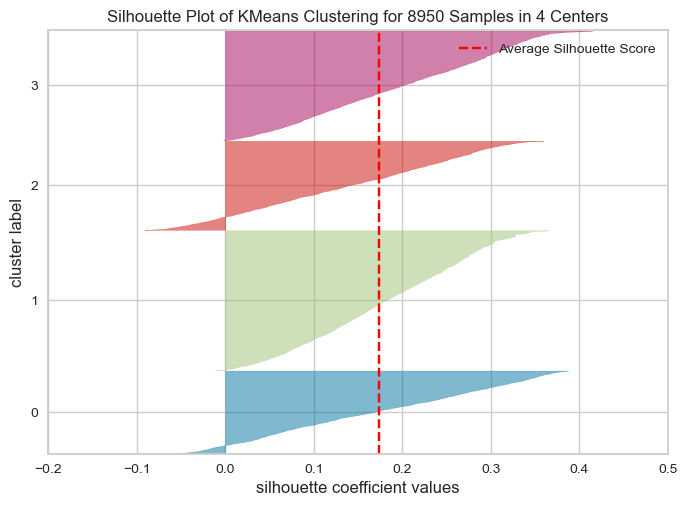

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()
plt.show()

Модель, в общем, справляется, но отрицательный коэффициент присутствует.

In [47]:
KM_2_clusters = KMeans(n_clusters=2, init='k-means++').fit(data_scaled) # initialise and fit K-Means model

KM2_clustered = data_scaled.copy()
KM2_clustered.loc[:,'Cluster'] = KM_2_clusters.labels_ # append labels to points
KM2_clustered

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,Cluster
0,0.360680,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.030404,-0.771610,-0.708951,-0.694434,-0.708130,-0.541199,-0.646812,-0.694622,0
1,0.360680,1.297983,-1.180155,-0.802193,-0.871405,2.382407,1.039128,1.293765,1.365305,0.472155,-1.264994,-0.708951,-0.939271,0.690317,0.452999,-1.099712,0.125978,0
2,0.360680,0.539152,0.302910,0.772805,-0.871405,-0.786629,1.039128,-0.260907,0.391952,0.472155,1.201929,2.515681,-0.939271,-0.708130,-0.541199,0.258988,-0.694622,1
3,0.360680,0.539152,1.044443,1.560304,-0.871405,-0.152822,1.039128,-1.815578,-1.554756,-0.853097,-1.018302,-0.386487,-0.939271,-0.241981,-0.541199,-0.646812,0.125978,0
4,0.360680,-0.219680,-0.438623,-0.014694,-0.871405,-0.786629,-0.661712,-0.260907,-0.581402,0.472155,-1.018302,-0.386487,-0.939271,-0.708130,-0.541199,-0.646812,-0.694622,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.472155,1.201929,-0.708951,1.264261,-0.708130,1.115797,-0.193912,-0.694622,1
8946,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-1.554756,0.472155,1.201929,-0.708951,1.264261,-0.708130,-0.541199,-0.193912,-0.694622,1
8947,-4.122768,-0.978511,-0.438623,-0.802193,0.052218,-0.786629,-1.512132,-1.038243,-0.581402,0.030404,0.955237,-0.708951,0.774588,-0.708130,0.452999,-0.646812,-0.694622,1
8948,-4.122768,-0.978511,-1.180155,-0.802193,-0.871405,-0.152822,-2.362553,-1.038243,-0.581402,0.030404,-1.264994,-0.708951,-0.939271,0.224168,0.452999,-1.099712,0.125978,0


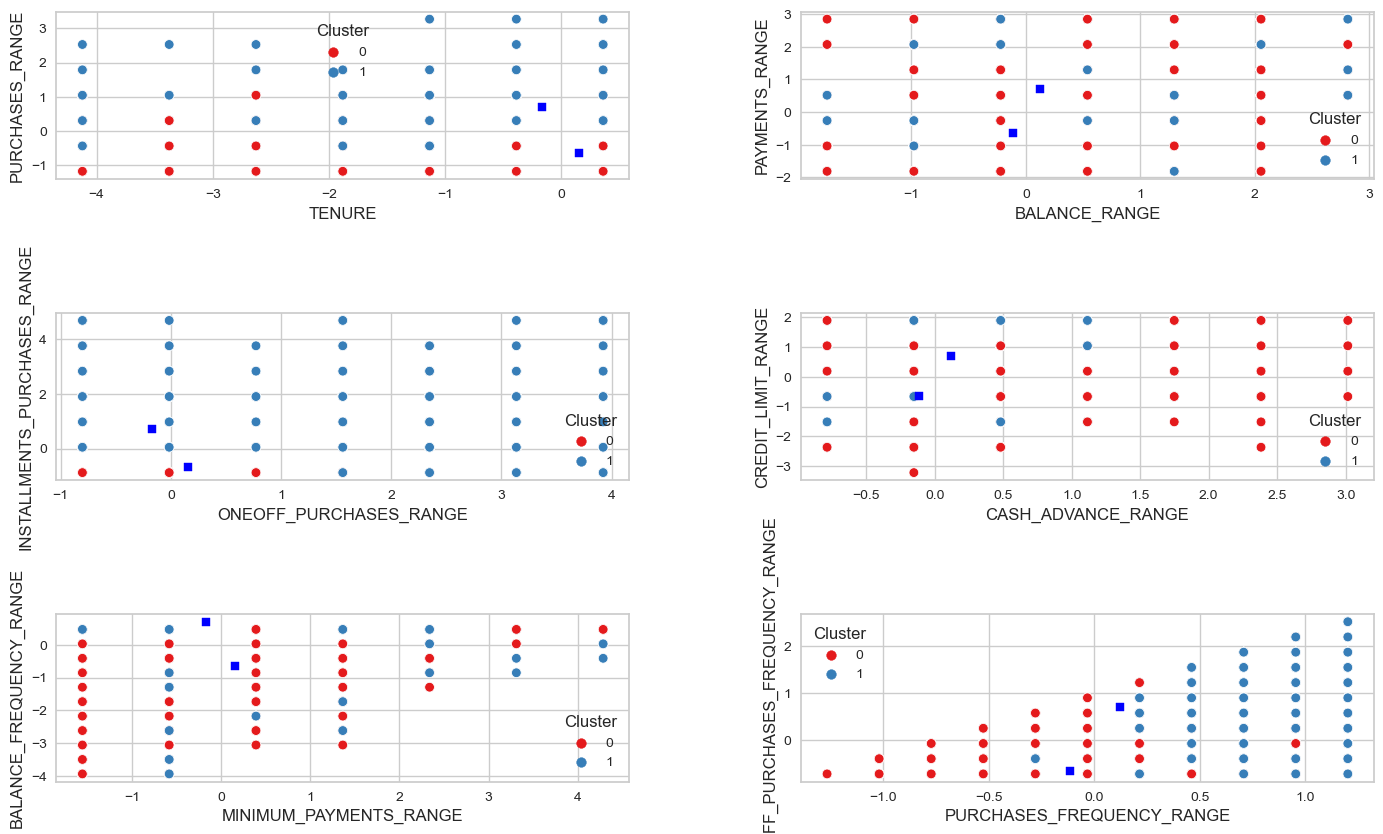

In [48]:
fig1, (axes) = plt.subplots(3,2, figsize = (17,10))

sns.scatterplot(x=KM2_clustered['TENURE'], y=KM2_clustered['PURCHASES_RANGE'], data=KM2_clustered, 
                hue = 'Cluster', ax = axes[0,0], palette='Set1', legend = 'full')
sns.scatterplot(x=KM2_clustered['BALANCE_RANGE'], y=KM2_clustered['PAYMENTS_RANGE'], data = KM2_clustered, 
                hue = 'Cluster', ax = axes[0,1], palette='Set1', legend = 'full')
sns.scatterplot(x=KM2_clustered['ONEOFF_PURCHASES_RANGE'], y=KM2_clustered['INSTALLMENTS_PURCHASES_RANGE'], data=KM2_clustered, 
                hue = 'Cluster', ax = axes[1,0], palette='Set1', legend = 'full')
sns.scatterplot(x=KM2_clustered['CASH_ADVANCE_RANGE'], y=KM2_clustered['CREDIT_LIMIT_RANGE'], data = KM2_clustered, 
                hue = 'Cluster', ax = axes[1,1], palette='Set1', legend = 'full')
sns.scatterplot(x=KM2_clustered['MINIMUM_PAYMENTS_RANGE'], y=KM2_clustered['BALANCE_FREQUENCY_RANGE'], data=KM2_clustered, 
                hue = 'Cluster', ax = axes[2,0], palette='Set1', legend = 'full')
sns.scatterplot(x=KM2_clustered['PURCHASES_FREQUENCY_RANGE'], y=KM2_clustered['ONEOFF_PURCHASES_FREQUENCY_RANGE'], data = KM2_clustered, 
                hue = 'Cluster', ax = axes[2,1], palette='Set1', legend = 'full')

axes[0,0].scatter(KM_2_clusters.cluster_centers_[:,1], KM_2_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[0,1].scatter(KM_2_clusters.cluster_centers_[:,0], KM_2_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[1,0].scatter(KM_2_clusters.cluster_centers_[:,1], KM_2_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[1,1].scatter(KM_2_clusters.cluster_centers_[:,0], KM_2_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[2,0].scatter(KM_2_clusters.cluster_centers_[:,1], KM_2_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')
axes[2,1].scatter(KM_2_clusters.cluster_centers_[:,0], KM_2_clusters.cluster_centers_[:,2], marker = 's', s=40, c='blue')

plt.subplots_adjust(wspace=0.3,hspace=0.8)
plt.show()

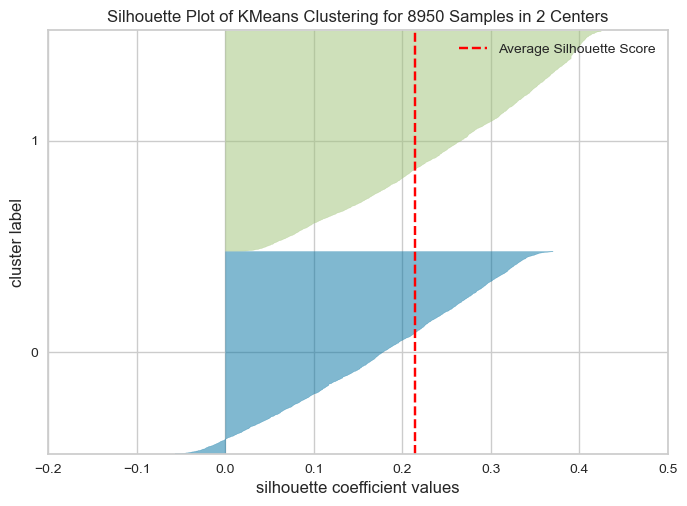

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(n_clusters=2, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(data_scaled)
visualizer.show()
plt.show()

Данный вариант дает более точные результаты. Но уменьшение кластеров не самая лучшая стратегия...

CPU times: total: 188 ms
Wall time: 57.3 ms


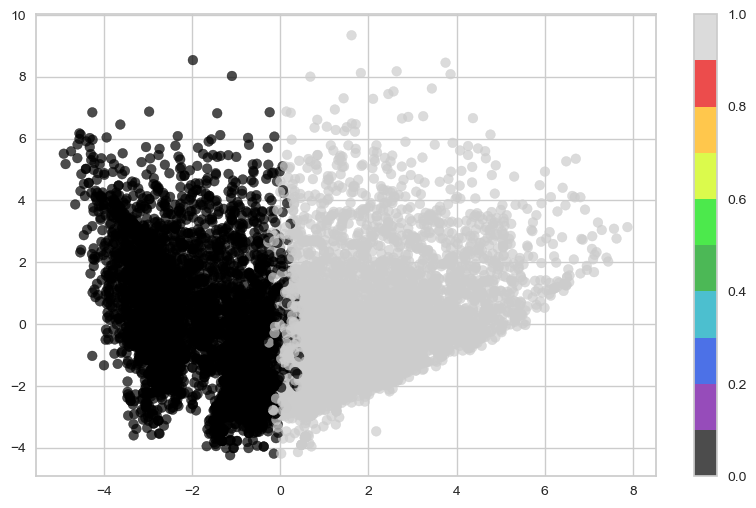

In [55]:
%%time
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c = KM2_clustered['Cluster'], alpha=0.7, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()



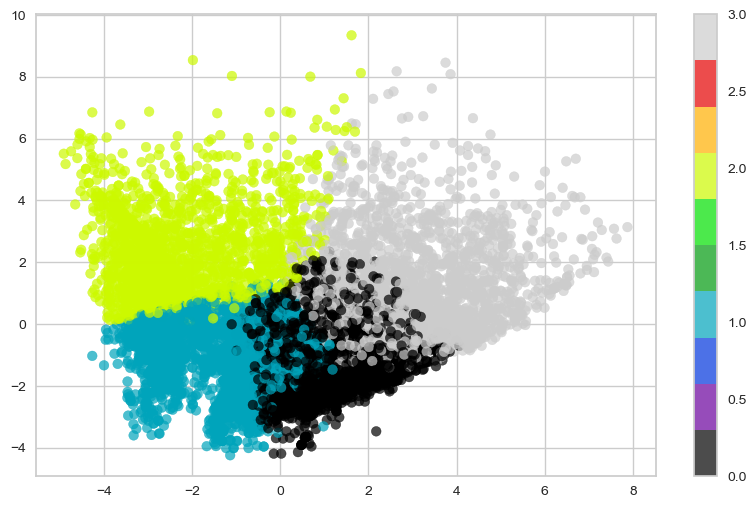

In [56]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(data_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c = KM__clustered['Cluster'], alpha=0.7, cmap = plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()

По резульатам проделанной работы, можно сказать, что для данного дата-сета оптимальнее использовать кластеризацию второй размерности KMeans, если важна точность определения попадания. Снижение размерности позволяет более точно предсказать(если так можно сказать), попадание в определенную категорию. 